In [5]:
import os
import pandas as pd
import json
import re
import numpy as np
import time
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
excel_file = "textos_resultados.xlsx"
df = pd.read_excel(excel_file)
df.shape


(2000, 7)

In [6]:
df

,ID,Texto,Categoria,Categoría de 1 a 5,Dataset,calificacion_tipo_texto,calificacion_humor
0,1,"- ¡Rápido, necesitamos sangre! - Yo soy 0 posi...",Humor,4.0,test,1,3.0
1,3,El otro día unas chicas llamarón a mi puerta y...,Humor,3.0,test,1,3.0
2,6,Van dos ciegos y le dice uno al otro: - Ojalá...,Humor,2.0,test,1,4.0
3,7,Noticia de última hora!! Muere una suegra at...,Humor,4.0,test,1,3.0
4,9,"– Mamá, mamá, ¿me haces un bocata de jamón? – ...",Humor,1.0,test,1,2.0
...,...,...,...,...,...,...,...
1995,10910,¿Qué país es famoso por su rueda de queso cono...,No Humor,NaN,test,0,1.0
1996,10918,¿Quién fue el primer hombre en pisar la luna? ...,No Humor,NaN,test,0,1.0
1997,10919,¿Cómo se llama la última cena de Pascua que Je...,No Humor,NaN,test,0,1.0
1998,10921,¿En qué país se encuentran las pirámides de Gi...,No Humor,NaN,test,0,1.0


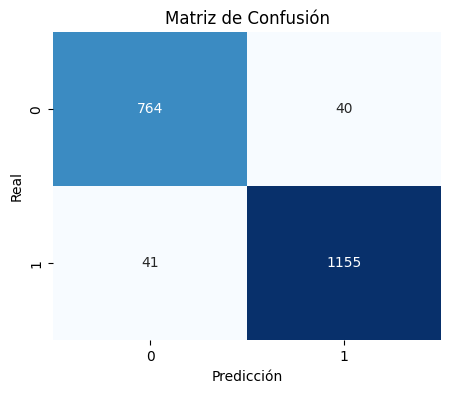

In [7]:
y_true =  df["Categoria"].map({
    "Humor": 1,
    "No Humor": 0  # ajusta esto si se llama diferente
})
y_pred = df['calificacion_tipo_texto']
cm = confusion_matrix(y_true, y_pred)

# Crear gráfico
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [8]:
print("Reporte de clasificación:")
print(classification_report(y_true, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       804
           1       0.97      0.97      0.97      1196

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [16]:
y_true =  df[(df['Categoria'] == 'Humor') & (df['calificacion_tipo_texto'] == 1)]["Categoría de 1 a 5"]
y_pred = df[(df['Categoria'] == 'Humor')  & (df['calificacion_tipo_texto'] == 1)]['calificacion_humor']

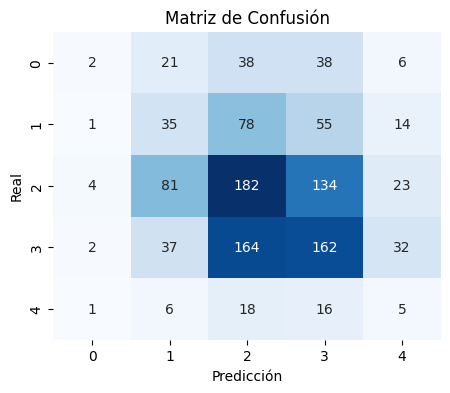

In [17]:
cm = confusion_matrix(y_true, y_pred)

# Crear gráfico
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [18]:
print("Reporte de clasificación:")
print(classification_report(y_true, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

         1.0       0.20      0.02      0.03       105
         2.0       0.19      0.19      0.19       183
         3.0       0.38      0.43      0.40       424
         4.0       0.40      0.41      0.40       397
         5.0       0.06      0.11      0.08        46

    accuracy                           0.33      1155
   macro avg       0.25      0.23      0.22      1155
weighted avg       0.33      0.33      0.32      1155

